<a href="https://colab.research.google.com/github/mashuai191/machine_learning/blob/master/computer_vision/matchShape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import cv2
import os


os.listdir('gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test')
BASE_DIR = 'gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test'

In [12]:
for root, dirs, files in os.walk(os.path.join(BASE_DIR, "dataset"), topdown=False):
   for name in files:
      print(os.path.join(root, name))
      #print (name)
   for name in dirs:
      print(os.path.join(root, name))

gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/21.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/33.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/32.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/31.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/27.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/25.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/24.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/26.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/22.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/23.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/34.png
gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/11.png
gdrive/My Drive/App/machine_

In [0]:
import pandas as pd
files = sorted(files)
#print (files)
#df_ = pd.DataFrame(index=files, columns=files)
#df_

## SSIM

In [14]:
import skimage
print (skimage.__version__)
from skimage.measure import compare_ssim as ssim

df_ = pd.DataFrame(index=files, columns=files)

for index, row in df_.iterrows():
    #print(index)
    im1 = cv2.imread(os.path.join(root, index),cv2.IMREAD_GRAYSCALE)
    _,im1 = cv2.threshold(im1, 128, 255, cv2.THRESH_BINARY)

    for col_idx, col_val in row.items():
        #print (col_idx)
        im2 = cv2.imread(os.path.join(root, col_idx),cv2.IMREAD_GRAYSCALE)
        _,im2 = cv2.threshold(im2, 128, 255, cv2.THRESH_BINARY)
        #df_.loc[index, col_idx] = cv2.matchShapes(im1,im2,cv2.CONTOURS_MATCH_I1,0)
        df_.loc[index, col_idx] = ssim(im1, im2)

df_

0.15.0


,11.png,12.png,13.png,14.png,15.png,16.png,17.png,21.png,22.png,23.png,24.png,25.png,26.png,27.png,31.png,32.png,33.png,34.png,35.png,36.png,37.png
11.png,1,0.978063,0.976522,0.960338,0.957335,0.935072,0.972258,0.996009,0.978125,0.969051,0.955109,0.959122,0.938571,0.948897,0.942497,0.927464,0.927169,0.927371,0.926904,0.927005,0.927169
12.png,0.978063,1,0.973474,0.954431,0.952065,0.93353,0.962715,0.978253,0.994303,0.967283,0.950665,0.95629,0.937055,0.939729,0.940877,0.927705,0.927409,0.927626,0.927144,0.927245,0.927409
13.png,0.976522,0.973474,1,0.961488,0.958443,0.934782,0.975198,0.977474,0.972146,0.987964,0.955562,0.963111,0.938105,0.951266,0.94481,0.927869,0.927573,0.927775,0.927308,0.927409,0.927573
14.png,0.960338,0.954431,0.961488,1,0.984321,0.944332,0.974837,0.959886,0.95609,0.961347,0.978608,0.977982,0.946604,0.951096,0.950372,0.927409,0.927113,0.927315,0.926848,0.926949,0.927113
15.png,0.957335,0.952065,0.958443,0.984321,1,0.946763,0.968577,0.957372,0.954368,0.95983,0.972094,0.986374,0.948681,0.945272,0.951391,0.927611,0.927315,0.927517,0.92705,0.927151,0.927315
16.png,0.935072,0.93353,0.934782,0.944332,0.946763,1,0.938883,0.937216,0.937448,0.941511,0.956192,0.951658,0.995245,0.91757,0.940511,0.927144,0.926848,0.92705,0.926583,0.926684,0.926848
17.png,0.972258,0.962715,0.975198,0.974837,0.968577,0.938883,1,0.971501,0.964288,0.968818,0.964218,0.967454,0.941803,0.97509,0.947626,0.927245,0.926949,0.927151,0.926684,0.926785,0.926949
21.png,0.996009,0.978253,0.977474,0.959886,0.957372,0.937216,0.971501,1,0.981815,0.970004,0.955738,0.962812,0.940716,0.948141,0.946186,0.931154,0.930858,0.931061,0.930593,0.930695,0.930858
22.png,0.978125,0.994303,0.972146,0.95609,0.954368,0.937448,0.964288,0.981815,1,0.965956,0.953585,0.961688,0.940973,0.941302,0.946275,0.933103,0.932807,0.933024,0.932542,0.932643,0.932807
23.png,0.969051,0.967283,0.987964,0.961347,0.95983,0.941511,0.968818,0.970004,0.965956,1,0.96321,0.964498,0.944718,0.944738,0.950332,0.934404,0.934108,0.934311,0.933843,0.933945,0.934108


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <a list of 21 Text xticklabel objects>)

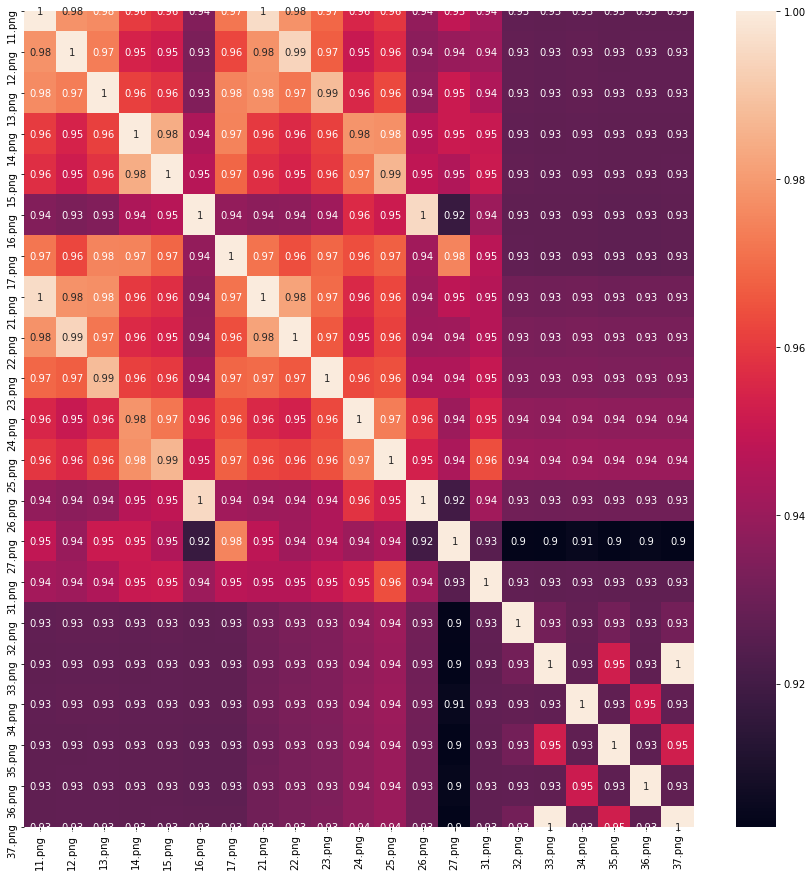

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

df_= df_.astype(float)
#print (df_.dtypes)

fig, ax = plt.subplots(figsize=(15, 15)) 
sns.heatmap(df_, annot=True, ax=ax)
plt.yticks(rotation=90) 
plt.xticks(rotation=90) 



Above result shows that it's hard to the difference between normal (1*) and abnormal (2*) images

## Hu Moment

In [28]:
df_ = pd.DataFrame(index=files, columns=files)

for index, row in df_.iterrows():
    #print(index)
    im1 = cv2.imread(os.path.join(root, index),cv2.IMREAD_GRAYSCALE)
    _,im1 = cv2.threshold(im1, 128, 255, cv2.THRESH_BINARY)

    for col_idx, col_val in row.items():
        #print (col_idx)
        im2 = cv2.imread(os.path.join(root, col_idx),cv2.IMREAD_GRAYSCALE)
        _,im2 = cv2.threshold(im2, 128, 255, cv2.THRESH_BINARY)
        df_.loc[index, col_idx] = cv2.matchShapes(im1,im2,cv2.CONTOURS_MATCH_I2,0)
        #df_.loc[index, col_idx] = ssim(im1, im2)

df_

,11.png,12.png,13.png,14.png,15.png,16.png,17.png,21.png,22.png,23.png,24.png,25.png,26.png,27.png,31.png,32.png,33.png,34.png,35.png,36.png,37.png
11.png,0,0.0248715,0.00432808,0.000513109,0.0103171,0.0479421,0.00190636,0.107217,0.143912,0.81981,0.695417,0.555706,0.411924,0.773693,0,0.0248715,0.000513109,0.0103171,0.0479421,0.00190636,0.000513109
12.png,0.0248715,0,0.0291995,0.0250166,0.0351886,0.0230706,0.0229651,0.132088,0.168784,0.794938,0.670545,0.580577,0.387052,0.798564,0.0248715,4.44089e-16,0.0250166,0.0351886,0.0230706,0.0229651,0.0250166
13.png,0.00432808,0.0291995,0,0.00418291,0.00598905,0.0522702,0.00623444,0.102889,0.139584,0.824138,0.699745,0.551378,0.416252,0.769365,0.00432808,0.0291995,0.00418291,0.00598905,0.0522702,0.00623444,0.00418291
14.png,0.000513109,0.0250166,0.00418291,0,0.010172,0.0480873,0.00205153,0.107072,0.143767,0.819955,0.695562,0.55556,0.412069,0.773548,0.000513109,0.0250166,6.66134e-16,0.010172,0.0480873,0.00205153,6.66134e-16
15.png,0.0103171,0.0351886,0.00598905,0.010172,0,0.0582592,0.0122235,0.0968998,0.133595,0.830127,0.705734,0.545389,0.422241,0.763376,0.0103171,0.0351886,0.010172,6.66134e-16,0.0582592,0.0122235,0.010172
16.png,0.0479421,0.0230706,0.0522702,0.0480873,0.0582592,0,0.0460357,0.155159,0.191854,0.771868,0.647475,0.603648,0.363981,0.821635,0.0479421,0.0230706,0.0480873,0.0582592,1.33227e-15,0.0460357,0.0480873
17.png,0.00190636,0.0229651,0.00623444,0.00205153,0.0122235,0.0460357,0,0.109123,0.145819,0.817903,0.693511,0.557612,0.410017,0.775599,0.00190636,0.0229651,0.00205153,0.0122235,0.0460357,0,0.00205153
21.png,0.107217,0.132088,0.102889,0.107072,0.0968998,0.155159,0.109123,0,0.0366954,0.927027,0.802634,0.448489,0.51914,0.666476,0.107217,0.132088,0.107072,0.0968998,0.155159,0.109123,0.107072
22.png,0.143912,0.168784,0.139584,0.143767,0.133595,0.191854,0.145819,0.0366954,0,0.963722,0.839329,0.411793,0.555836,0.629781,0.143912,0.168784,0.143767,0.133595,0.191854,0.145819,0.143767
23.png,0.81981,0.794938,0.824138,0.819955,0.830127,0.771868,0.817903,0.927027,0.963722,0,0.124393,1.37552,0.407886,1.5935,0.81981,0.794938,0.819955,0.830127,0.771868,0.817903,0.819955


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <a list of 21 Text xticklabel objects>)

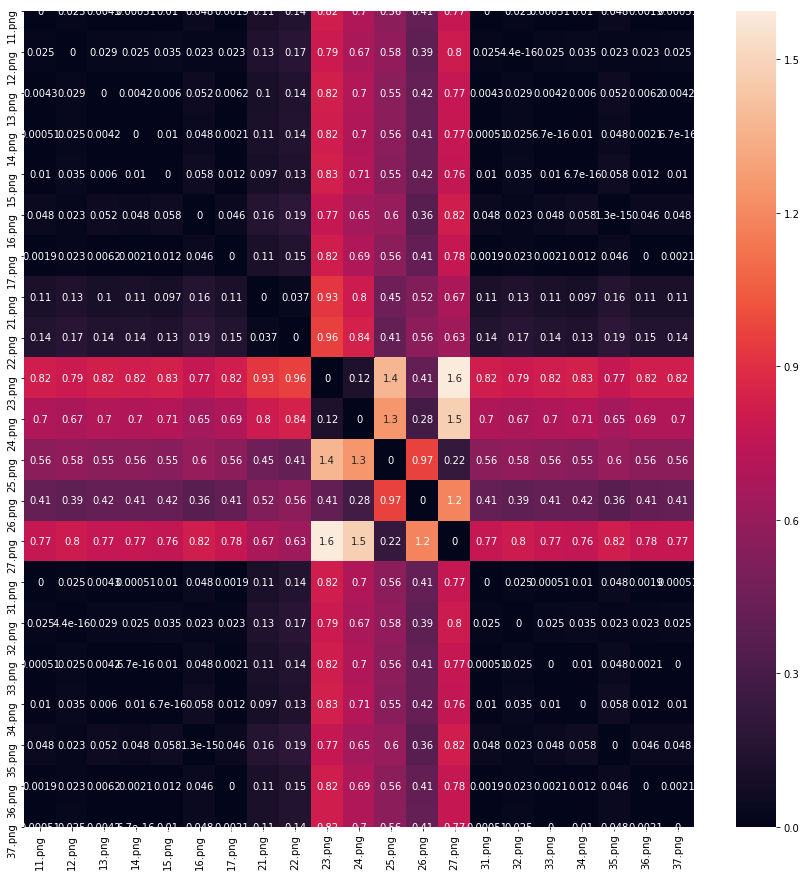

In [29]:
df_= df_.astype(float)
#print (df_.dtypes)

fig, ax = plt.subplots(figsize=(15, 15)) 
sns.heatmap(df_, annot=True, ax=ax)
plt.yticks(rotation=90) 
plt.xticks(rotation=90) 

## Zernike Moment

(488, 221) 357
[0.31830989 0.58573894 0.69610539 0.79653205 0.71392426 0.94980835
 0.54926324 0.67591495 1.04896079 0.37383862 0.63182683 1.10087311
 0.10410004 0.30371713 0.63462817 1.11500038 0.14699364 0.39545513
 0.7073049  1.10232712 0.18392235 0.29125042 0.53159606 0.82712194
 1.07418604 0.20533999 0.36342822 0.64130705 0.95651784 1.04093165]


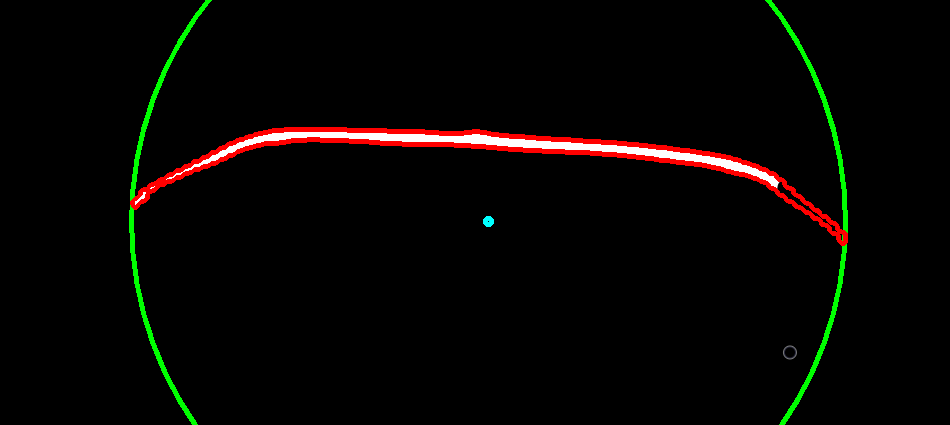

In [47]:
!pip install mahotas
import mahotas
import numpy as np
from google.colab.patches import cv2_imshow

thresh = None
img = cv2.imread('gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/11.png',cv2.IMREAD_GRAYSCALE)
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
img,contours,hierarchy = cv2.findContours(thresh.copy(), 1, 2)

cnt = sorted(contours, key = cv2.contourArea, reverse = True)[0]
#cnt = contours[0]
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
print (center, radius)

z_im = mahotas.features.zernike_moments(thresh, radius, degree=9, cm=center)
#z_im = mahotas.features.zernike_moments(thresh,  357,degree=9, cm=(488,221))
print (z_im)

img2 = cv2.imread('gdrive/My Drive/App/machine_learning/cv/shanghaidianqi_line5/test/dataset/21.png',cv2.IMREAD_COLOR)
#cv2.circle(img2,center,radius,(0,255,0),3)
#cv2.circle(img2,center,3,(255,255,0),3)
cv2.circle(img2,(488, 221),357,(0,255,0),3)
cv2.circle(img2,(488, 221),3,(255,255,0),3)
cv2.drawContours(img2, [cnt], 0, (0,0,255), 3)

cv2_imshow(img2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

it's strange that 11.png and 21.png has different shape but got same moments when using the same center of mass and radius.

In [26]:

from scipy.spatial import distance as dist

df_ = pd.DataFrame(index=files, columns=files)



for index, row in df_.iterrows():
    #print(index)
    center = None
    radius = None

    im1 = cv2.imread(os.path.join(root, index),cv2.IMREAD_GRAYSCALE)
    _,im1 = cv2.threshold(im1, 128, 255, cv2.THRESH_BINARY)

    img,contours,hierarchy = cv2.findContours(im1.copy(), 1, 2)
    cnt = sorted(contours, key = cv2.contourArea, reverse = True)[0]
    #cnt = contours[0]
    (x1,y1),radius1 = cv2.minEnclosingCircle(cnt) 
    center1 = (int(x1),int(y1))    
    radius1 = int(radius1)

    for col_idx, col_val in row.items():
        #print ("    ", col_idx)
        im2 = cv2.imread(os.path.join(root, col_idx),cv2.IMREAD_GRAYSCALE)
        _,im2 = cv2.threshold(im2, 128, 255, cv2.THRESH_BINARY)
        #df_.loc[index, col_idx] = cv2.matchShapes(im1,im2,cv2.CONTOURS_MATCH_I1,0)
        #df_.loc[index, col_idx] = ssim(im1, im2)

        img,contours,hierarchy = cv2.findContours(im2, 1, 2)
        cnt = sorted(contours, key = cv2.contourArea, reverse = True)[0]
        #cnt = contours[0]
        (x2,y2),radius2 = cv2.minEnclosingCircle(cnt) 
        center2 = (int(x2),int(y2))    
        radius2 = int(radius2)

        if radius1 > radius2:
            center = center1
            radius = radius1
        elif radius1 == radius2:
            if index < col_idx:
                center = center1
                radius = radius1
            else:
                center = center2
                radius = radius2
        else:
            center = center2
            radius = radius2    
        z_im1 = mahotas.features.zernike_moments(im1, radius1,cm=center1)
        z_im2 = mahotas.features.zernike_moments(im2, radius1,cm=center1)
        #print (z_im1)
        #print (z_im2)
        df_.loc[index, col_idx] = dist.euclidean(z_im1, z_im2)
df_

11.png
12.png
13.png
14.png
15.png
16.png
17.png
21.png
22.png
23.png
24.png
25.png
26.png
27.png
31.png
32.png
33.png
34.png
35.png
36.png
37.png


,11.png,12.png,13.png,14.png,15.png,16.png,17.png,21.png,22.png,23.png,24.png,25.png,26.png,27.png,31.png,32.png,33.png,34.png,35.png,36.png,37.png
11.png,0,0.12778,0.157807,0.0214598,0.14132,0.589655,0.0789,0,0.12778,0.157807,1.34322,4.72338,0.589655,0.750087,3.75182,1.97558,2.52906,3.53082,2.31206,3.53082,2.52906
12.png,0.185158,0,0.0549176,0.17977,0.353154,0.81014,0.305321,0.185158,0,0.0549176,0.860257,6.5003,0.81014,1.07118,5.71982,2.32443,2.82724,3.83381,2.65033,3.83381,2.82724
13.png,0.158528,0.148272,0,0.141647,0.288897,0.715453,0.2457,0.158528,0.148272,0,1.12233,5.88382,0.715453,0.921549,4.12708,2.15182,2.68701,3.68875,2.48587,3.68875,2.68701
14.png,0.0661864,0.265225,0.180025,0,0.167871,0.662371,0.111809,0.0661864,0.265225,0.180025,0.983087,5.97982,0.662371,0.98719,5.14205,2.25016,2.77635,3.79512,2.58087,3.79512,2.77635
15.png,0.139102,0.268956,0.294312,0.154231,0,0.469092,0.100394,0.139102,0.268956,0.294312,1.43641,5.02136,0.469092,0.705824,4.32214,1.94464,2.49714,3.50309,2.28146,3.50309,2.49714
16.png,0.71692,0.825212,0.863399,0.687204,0.540197,0,0.665184,0.71692,0.825212,0.863399,1.78366,4.59556,0,0.50269,3.89313,1.52185,2.0799,3.07072,1.85578,3.07072,2.0799
17.png,0.0755041,0.199368,0.210095,0.109582,0.123919,0.589991,0,0.0755041,0.199368,0.210095,1.29751,4.27421,0.589991,0.679184,3.43828,1.92509,2.48053,3.4891,2.25953,3.4891,2.48053
21.png,0,0.217964,0.162716,0.0524711,0.117357,0.510536,0.103145,0,0.217964,0.162716,0.682045,6.35023,0.510536,0.526442,2.48804,1.64374,2.20948,3.19699,1.99601,3.19699,2.20948
22.png,0.207554,0,0.00600293,0.133148,0.289546,0.786718,0.295996,0.207554,0,0.00600293,1.04254,3.40862,0.786718,0.812407,2.55018,1.88372,2.43453,3.40862,2.22021,3.40862,2.43453
23.png,0.158528,0.148272,0,0.141647,0.288897,0.715453,0.2457,0.158528,0.148272,0,1.12233,5.88382,0.715453,0.921549,4.12708,2.15182,2.68701,3.68875,2.48587,3.68875,2.68701


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 <a list of 21 Text xticklabel objects>)

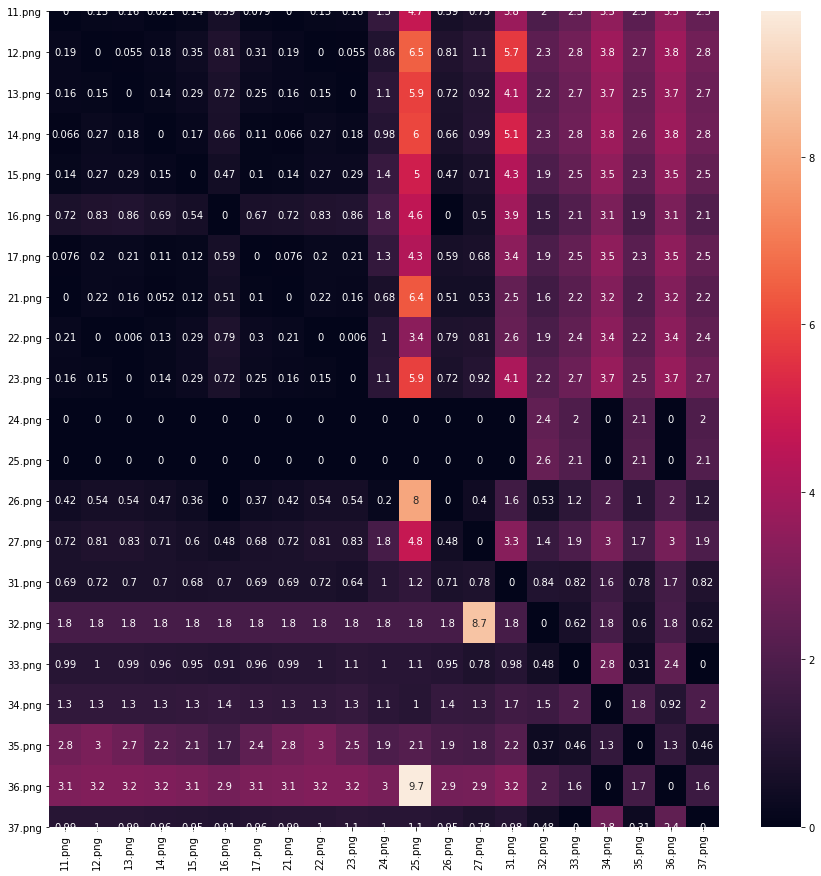

In [27]:
df_= df_.astype(float)
#print (df_.dtypes)

fig, ax = plt.subplots(figsize=(15, 15)) 
sns.heatmap(df_, annot=True, ax=ax)
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 

In [0]:
# https://www.pyimagesearch.com/2017/06/19/image-difference-with-opencv-and-python/


In [0]:
# import the necessary packages
from skimage.measure import compare_ssim
import argparse
import imutils
import cv2
from google.colab.patches import cv2_imshow

In [0]:
# load the two input images
imageA = cv2.imread(os.path.join(root, '11.png'))
imageB = cv2.imread(os.path.join(root, '23.png'))
 
# convert the images to grayscale
grayA = cv2.cvtColor(imageA, cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(imageB, cv2.COLOR_BGR2GRAY)

cv2_imshow(grayA)
cv2_imshow(grayB)

In [0]:
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))

In [0]:

# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)

In [0]:
# loop over the contours
for c in cnts:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(imageA, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(imageB, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
# show the output images
cv2_imshow(imageA)
cv2_imshow(imageB)
cv2_imshow(diff)
cv2_imshow(thresh)
#cv2.waitKey(0)